In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('KNN_Project_Data',index_col=0)

In [5]:
df.head()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
XVPM,,,,,,,,,,
1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


KNN uses numbers to predict.  need to normalize the data set.

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [10]:
scaler.fit(df.drop('TARGET CLASS',axis =1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis =1))

In [13]:
scaled_features

array([[-0.44343461,  1.61980773, -0.9582548 , ..., -0.93279392,
         1.00831307, -1.06962723],
       [-1.05657361,  1.7419175 , -1.50422015, ..., -0.46186435,
         0.25832069, -1.04154625],
       [-0.43698145,  0.77579285,  0.21339413, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ..., 
       [-0.97901454,  0.83771499,  0.01401811, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [-0.99239881,  0.0303711 ,  1.06295359, ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.79510909,  1.12180047,  1.18594424, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [14]:
df_feat_scaled = pd.DataFrame(scaled_features,columns=df.columns[:-1])

slice notation to get rid of target column ^

data is now ready b/c it is scaledb

In [15]:
from sklearn.cross_validation import train_test_split

In [16]:
X = df_feat_scaled

In [17]:
Y = df['TARGET CLASS']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

STart with K = 1 and use elbow method.

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn= KNeighborsClassifier(n_neighbors=1)

In [21]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [22]:
pred = knn.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print(confusion_matrix(y_test,pred))

[[118  45]
 [ 44 123]]


In [28]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.73      0.72      0.73       163
          1       0.73      0.74      0.73       167

avg / total       0.73      0.73      0.73       330



In [41]:
error_rate2=[]

In [42]:
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    avg_error = np.mean(pred_i!=y_test)
    #print(pred_i!=y_test)
    #print 'avg error:',avg_error 
    error_rate2.append(avg_error)


In [39]:
plt.figure(figsize=(10,6))

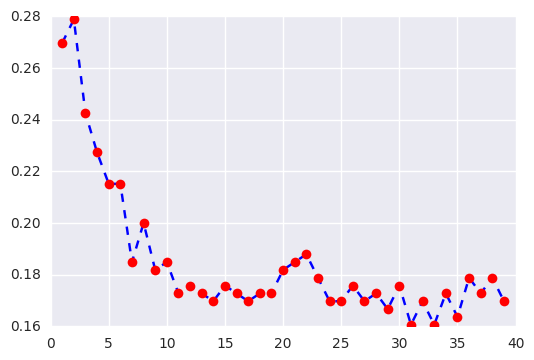

In [43]:
plt.plot(range(1,40),error_rate2,color='blue',linestyle='dashed',marker='o',markerfacecolor='r')

K = 15 should be a good k. above elbow is at around 10